# Short Tail Keywords for Marketing

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [14]:
data_train = pd.read_csv('[UCI] AAAI-14 Accepted Papers - Papers.csv')
data_train = data_train[['title','groups','keywords','topics']]

In [15]:
print('The length of the data is', len(data_train))
data_train.head()

The length of the data is 398


,title,groups,keywords,topics
0,Kernelized Bayesian Transfer Learning,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...
1,"""Source Free"" Transfer Learning for Text Class...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...
2,A Generalization of Probabilistic Serial to Ra...,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting
3,Lifetime Lexical Variation in Social Media,NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...
4,Hybrid Singular Value Thresholding for Tensor ...,Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...


## Data Transformation for Modeling

In [16]:
s = data_train['groups'].str.split('\n').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'groups'
del data_train['groups']
data_train = data_train.join(s).reset_index()

In [17]:
data_train.head()

,index,title,keywords,topics,groups
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA)
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW)
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA)
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP)
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM)


In [18]:
data_train['flags'] = pd.Series(np.ones(len(data_train)), index = data_train.index)
data_train.head()

,index,title,keywords,topics,groups,flags
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0


### Adding a Function for Matrix Creation

In [19]:
def matrix_from_df(data_train):
    matrix = data_train.pivot_table(index = ['title'], columns = ['groups'], values = 'flags')
    matrix = matrix.fillna(0).reset_index()
    x_cols = matrix.columns[1:]
    return matrix, x_cols

In [20]:
# Retrieve Matrix and x cols from dataframe
matrix, x_cols = matrix_from_df(data_train)
matrix.head()

groups,title,AI and the Web (AIW),Applications (APP),Cognitive Modeling (CM),Cognitive Systems (CS),Computational Sustainability and AI (CSAI),Game Playing and Interactive Entertainment (GPIE),Game Theory and Economic Paradigms (GTEP),Heuristic Search and Optimization (HSO),Human-Computation and Crowd Sourcing (HCC),...,Multiagent Systems (MAS),NLP and Knowledge Representation (NLPKR),NLP and Machine Learning (NLPML),NLP and Text Mining (NLPTM),Novel Machine Learning Algorithms (NMLA),Planning and Scheduling (PS),Reasoning under Uncertainty (RU),Robotics (ROB),Search and Constraint Satisfaction (SCS),Vision (VIS)
0,"""Source Free"" Transfer Learning for Text Class...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A Characterization of the Single-Peaked Single...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"A Computational Method for (MSS,CoMSS) Partiti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,A Control Dichotomy for Pure Scoring Rules,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Convex Formulation for Semi-supervised Multi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying Elbow Method and Variance Explained on Data Matrix

In [21]:
matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]

In [44]:
from sklearn.cluster import KMeans, SpectralClustering
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA

In [31]:
KM = [KMeans(n_clusters = k).fit(X) for k in range(1,50)]
centroids = [k.cluster_centers_ for k in KM]

c:\Users\gurpr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [33]:
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D, axis = 1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

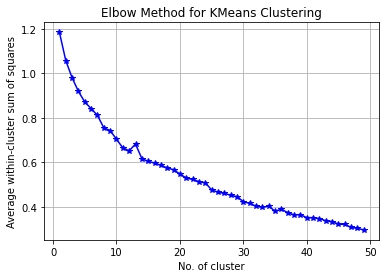

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,50), avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('No. of cluster')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

### Applying KMeans Clustering for Optimal Number of Clusters

In [43]:
matrix, x_cols = matrix_from_df(data_train)
X = matrix[x_cols]

cluster = KMeans(n_clusters = 9, random_state = 42)
matrix['cluster'] = cluster.fit_predict(X)
matrix.cluster.value_counts()

0    83
3    77
4    53
5    40
2    36
6    34
7    34
1    30
8     9
Name: cluster, dtype: int64

### Using PCA to Transform Group related Features into Two Components

In [46]:
pca = PCA(n_components = 2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['title','cluster','x','y']]
customer_clusters.head()

groups,title,cluster,x,y
0,"""Source Free"" Transfer Learning for Text Class...",3,0.615810,-0.060295
1,A Characterization of the Single-Peaked Single...,4,-0.756838,0.971322
2,"A Computational Method for (MSS,CoMSS) Partiti...",0,-0.287956,-0.216148
3,A Control Dichotomy for Pure Scoring Rules,4,-0.521295,0.570206
4,A Convex Formulation for Semi-supervised Multi...,5,0.198578,-0.129668


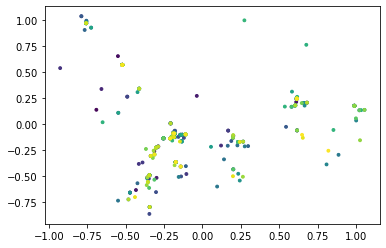

In [56]:
# Plotting Clusters in a two-Dimensional Space

cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(customer_clusters, columns=['x','y'])
cluster_centers['cluster'] = range(0, len(cluster_centers))

plt.scatter(customer_clusters['x'], customer_clusters['y'], s = 2, c = customer_clusters['cluster'])
plt.scatter(cluster_centers['x'], cluster_centers['y'], s = 8, c = cluster_centers['cluster'])


In [57]:
# Merging Matrix into Original DataFrame
customer_clusters.columns.name = None
df = data_train.merge(customer_clusters, on = 'title')
df.head()

,index,title,keywords,topics,groups,flags,cluster,x,y
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0,3,0.613870,0.245408
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0,3,0.615810,-0.060295
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0,3,0.615810,-0.060295
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0,4,-0.521295,0.570206
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0,0,-0.183192,-0.090091


### Creating a function to Generate WordCloud

In [72]:
import operator
from wordcloud import WordCloud, STOPWORDS

def wordcloud_object(word_string):

    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width = 1200, height=1000).generate(' '.join(word_string))
    return wordcloud


In [68]:
def plot_wordcloud(df, clusters, pivot):
    fig = plt.figure(figsize=(15,29.5))
    for cluster in range(clusters):
        List_ = []
        for x in df[df['cluster']==cluster][pivot]:
            try:
                List_.extend(x.split('\n'))
            except: 
                pass
        if List_:
            ax = fig.add_subplot(5,2,cluster+1)
            wordcloud = wordcloud_object(List_)
            plt.title('Cluster: %d'%(cluster+1))
            ax.imshow(wordcloud)
            ax.axis('off')

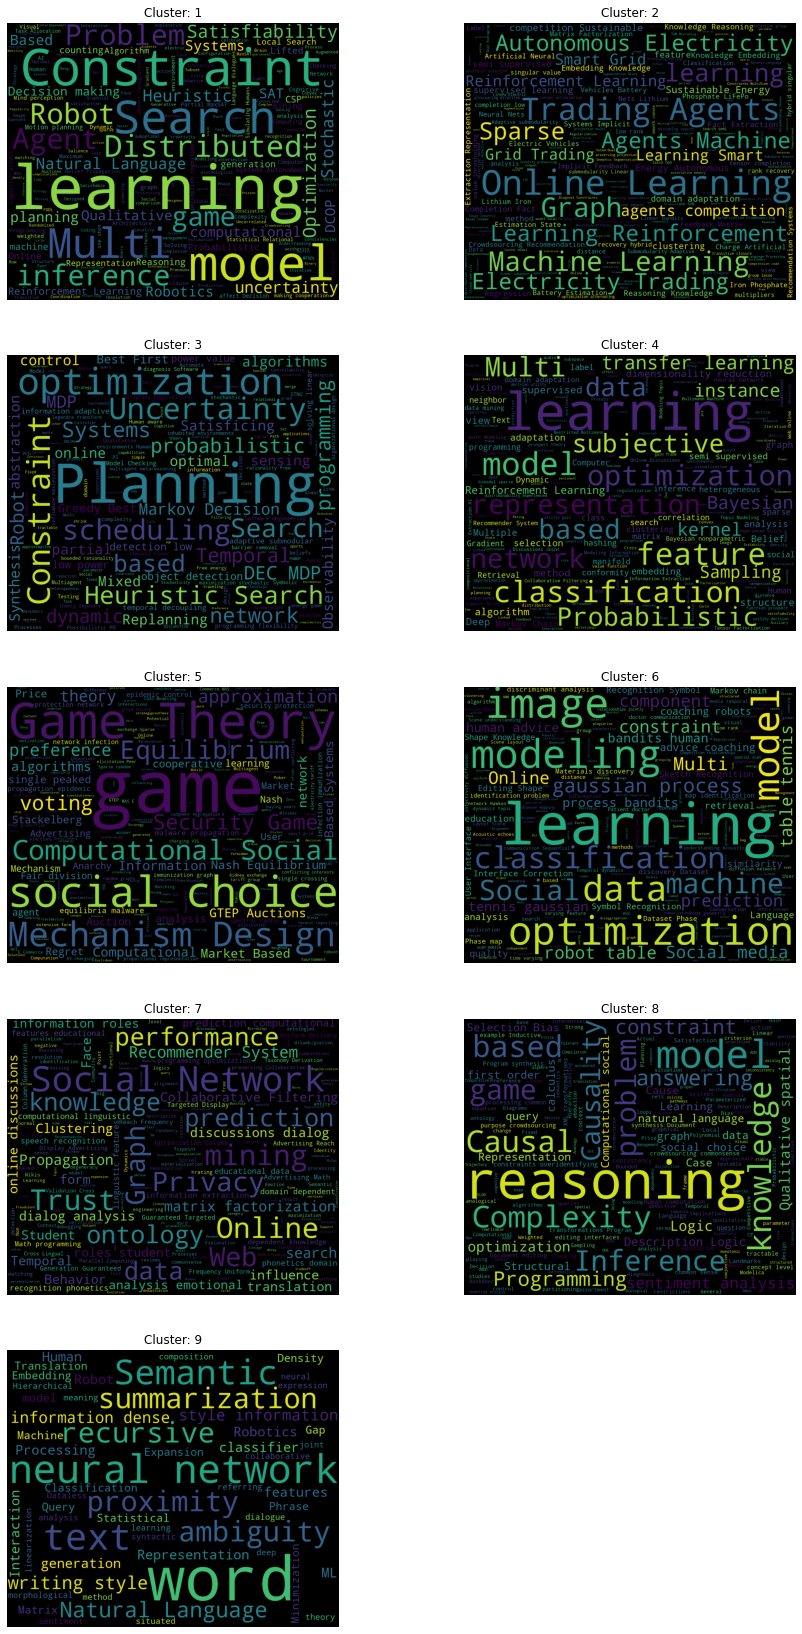

In [69]:
plot_wordcloud(df, cluster.n_clusters, 'keywords')

1. Cluster 1: Papers talking about search and robotics
2. Cluster 2: Papers talking in depth about models’ learning and optimization
3. Cluster 3: Topics of application of data analytics in games and social media analytics
4. Cluster 4: Topics of image recognition, robotics, and social media analytics
5. Cluster 5: Topics of linear programming and search 
6. Cluster 6: Papers on reasoning-based models
7. Cluster 7: Papers on application of data sciences in social graphs and other online mediums
8. Cluster 8: Topics ranging in knowledge graphs • Cluster 9: Papers concentrating on game theory and data security

### Define Method to Find Complete Keywords for Given Clusters and Unigram

In [73]:
def perform_cluster_group_audit(clusters, term):

    for cluster in clusters:
        df_cluster = df[df['cluster'] == cluster]
        print(f'Cluster number:{cluster+1}')
        keywords = list(df_cluster['keywords'])
        keywords = [keyword.split('\n') for keyword in keywords]
        keywords = [item for sublist in keywords for item in sublist]
        keywords = [keyword.lower() for keyword in keywords if term in keyword.lower()]
        keywords_freq = {x:keywords.count(x) for x in keywords}
        print(sorted(keywords_freq.items(), key=operator.itemgetter(1), reverse=True))
        print('\n')

In [76]:
# Using Function to Find Keywords for Search in clusters 0 and 4
perform_cluster_group_audit([0,4], 'search')

Cluster number:1
[('local search', 2), ('stochastic local search', 2), ('and/or search', 2), ('similarity search', 1), ('approximate nearest neighbor search', 1), ('heuristic search', 1), ('real-time search', 1), ('agent-centered search', 1), ('hierarchical search', 1), ('parallel search', 1), ('bounded suboptimal search', 1), ('best-first search', 1), ('suboptimal heuristic search', 1)]


Cluster number:5
[]




In [82]:
# Using Function to Find Keywords for Social in Clusters 2, 3, and 6
perform_cluster_group_audit([2,3,6], 'social')

Cluster number:3
[('social planning', 2)]


Cluster number:4
[('heterogeneous social networks', 2), ('social conformity', 2)]


Cluster number:7
[('social networks', 6), ('social network', 3), ('location based social network', 2), ('social network analysis', 2), ('social influence', 2), ('social explanation', 1)]


